In [1]:
import numpy as np
import pandas as pd
from ptrail.core.TrajectoryDF import PTRAILDataFrame
from ptrail.features.kinematic_features import KinematicFeatures
from ptrail.features.temporal_features import TemporalFeatures
import matplotlib.pyplot as plt
import ptrail.utilities.constants as const
from ptrail.preprocessing.interpolation import Interpolation
from ptrail.preprocessing.filters import Filters

pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)


pdf = pd.read_csv('./data/starkey.csv')
starkey = PTRAILDataFrame(data_set=pdf,
                          latitude='lat',
                          longitude='lon',
                          datetime='DateTime',
                          traj_id='Id')
print("Size of the Dataset: {}".format(starkey.shape))
starkey.head(5)

Size of the Dataset: (287136, 15)


lat         lon  StarkeyTime    GMDate  \
traj_id   DateTime                                                            
880109D01 1995-04-13 13:40:06  45.239682 -118.533204    229902006  21:40:06   
          1995-04-15 12:16:15  45.250521 -118.530438    230069775  20:16:15   
          1995-04-15 21:39:38  45.247943 -118.541455    230103578  05:39:38   
          1995-04-16 03:32:14  45.247429 -118.539530    230124734  11:32:14   
          1995-04-16 04:08:28  45.247117 -118.542579    230126908  12:08:28   

                                 GMTime   LocDate   LocTime  RadNum Species  \
traj_id   DateTime                                                            
880109D01 1995-04-13 13:40:06  19950413  19950413  13:40:06     409       D   
          1995-04-15 12:16:15  19950415  19950415  12:16:15     409       D   
          1995-04-15 21:39:38  19950416  19950415  21:39:38     409       D   
          1995-04-16 03:32:14  19950416  19950416  03:32:14     409       D   
          1995-04-16 04:08:28  19950416  19950416  04:08:28     409       D   

                                 UTME     UTMN  Year  Grensunr  Grensuns  \
traj_id   DateTime                                                         
880109D01 1995-04-13 13:40:06  379662  5010734    95  13:13:00  02:39:00   
          1995-04-15 12:16:15  379895  5011927    95  13:09:00  02:41:00   
          1995-04-15 21:39:38  379039  5011656    95  13:07:00  02:43:00   
          1995-04-16 03:32:14  379188  5011581    95  13:07:00  02:43:00   
          1995-04-16 04:08:28  378938  5011567    95  13:07:00  02:43:00   

                               Obswt  
traj_id   DateTime                    
880109D01 1995-04-13 13:40:06   1.47  
          1995-04-15 12:16:15   1.59  
          1995-04-15 21:39:38   1.34  
          1995-04-16 03:32:14   1.50  
          1995-04-16 04:08:28   1.34

In [2]:
t1 = starkey.loc[starkey.index.get_level_values(const.TRAJECTORY_ID).isin(['930429E08'])]
t1 = PTRAILDataFrame(data_set=t1.reset_index(), latitude='lat', longitude='lon', datetime='DateTime', traj_id='Id')
t1 = KinematicFeatures.create_distance_between_consecutive_column(t1)
filtered_t1 = Filters.hampel_outlier_detection(dataframe=t1, column_name='Distance_prev_to_curr')
interpolated_t1 = Interpolation.interpolate_position(dataframe=filtered_t1, time_jump=3600*2, ip_type='cubic')
temporal_features_t1 = TemporalFeatures.generate_temporal_features(interpolated_t1)
kinematic_features_k1 = KinematicFeatures.generate_kinematic_features(temporal_features_t1)

/home/yjharanwala/Desktop/PTRAIL/ptrail/preprocessing/filters.py:748: UserWarning: If kinematic features have been generated on the dataframe, then make sure to generate them again as outlier detection drops the point from the dataframe and does not run the kinematic features again.
  warnings.warn("If kinematic features have been generated on the dataframe, then make "


In [3]:
t2 = starkey.loc[starkey.index.get_level_values(const.TRAJECTORY_ID).isin(['940213D01'])]
t2 = PTRAILDataFrame(data_set=t2.reset_index(), latitude='lat', longitude='lon', datetime='DateTime', traj_id='Id')
t2 = KinematicFeatures.create_distance_between_consecutive_column(t2)
filtered_t2 = Filters.hampel_outlier_detection(dataframe=t2, column_name='Distance_prev_to_curr')
interpolated_t2 = Interpolation.interpolate_position(dataframe=filtered_t2, time_jump=3600*2, ip_type='cubic')
temporal_features_t2 = TemporalFeatures.generate_temporal_features(interpolated_t2)
kinematic_features_k2 = KinematicFeatures.generate_kinematic_features(temporal_features_t2)

/home/yjharanwala/Desktop/PTRAIL/ptrail/preprocessing/filters.py:748: UserWarning: If kinematic features have been generated on the dataframe, then make sure to generate them again as outlier detection drops the point from the dataframe and does not run the kinematic features again.
  warnings.warn("If kinematic features have been generated on the dataframe, then make "


In [4]:
t3 = starkey.loc[starkey.index.get_level_values(const.TRAJECTORY_ID).isin(['OSUX93110'])]
t3 = PTRAILDataFrame(data_set=t3.reset_index(), latitude='lat', longitude='lon', datetime='DateTime', traj_id='Id')
t3 = KinematicFeatures.create_distance_between_consecutive_column(t3)
filtered_t3 = Filters.hampel_outlier_detection(dataframe=t3, column_name='Distance_prev_to_curr')
interpolated_t3 = Interpolation.interpolate_position(dataframe=filtered_t3, time_jump=3600*2, ip_type='cubic')
temporal_features_t3 = TemporalFeatures.generate_temporal_features(interpolated_t3)
kinematic_features_k3 = KinematicFeatures.generate_kinematic_features(temporal_features_t3)

/home/yjharanwala/Desktop/PTRAIL/ptrail/preprocessing/filters.py:748: UserWarning: If kinematic features have been generated on the dataframe, then make sure to generate them again as outlier detection drops the point from the dataframe and does not run the kinematic features again.
  warnings.warn("If kinematic features have been generated on the dataframe, then make "


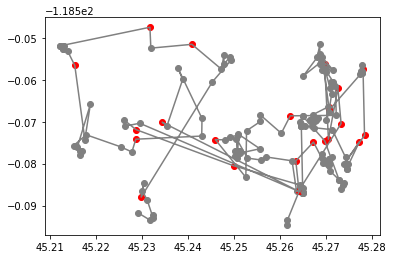

In [5]:
t1_coords = list(zip(t1['lat'], t1['lon']))
ft1_coords = list(zip(filtered_t1['lat'], filtered_t1['lon']))

fig = plt.figure()
ax = fig.add_subplot()
for i in range(len(t1_coords)):
    if t1_coords[i] in ft1_coords:
        ax.scatter(t1_coords[i][0], t1_coords[i][1], color='grey')
    else:
        ax.scatter(t1_coords[i][0], t1_coords[i][1], color='red')

ax.plot(t1['lat'], t1['lon'], color='grey')

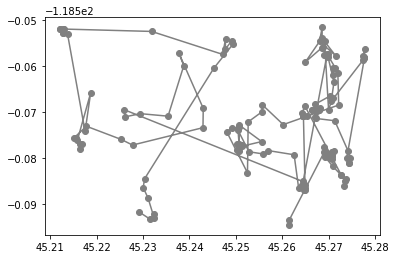

In [6]:
plt.scatter(filtered_t1['lat'], filtered_t1['lon'], color='grey'),
plt.plot(filtered_t1['lat'], filtered_t1['lon'], color='grey')

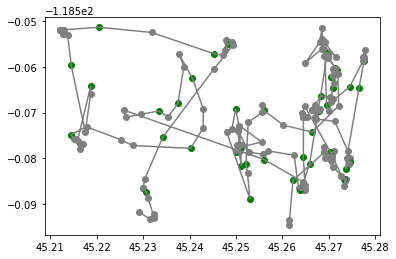

In [7]:
ip_coords = list(zip(interpolated_t1['lat'], interpolated_t1['lon']))
ft1_coords = list(zip(filtered_t1['lat'], filtered_t1['lon']))

fig1 = plt.figure()
ax1 = fig1.add_subplot()
for i in range(len(interpolated_t1)):
    if ip_coords[i] in ft1_coords:
        ax1.scatter(ip_coords[i][0], ip_coords[i][1], color='grey')
    else:
        ax1.scatter(ip_coords[i][0], ip_coords[i][1], color='green')

ax1.plot(interpolated_t1['lat'], interpolated_t1['lon'], color='grey')


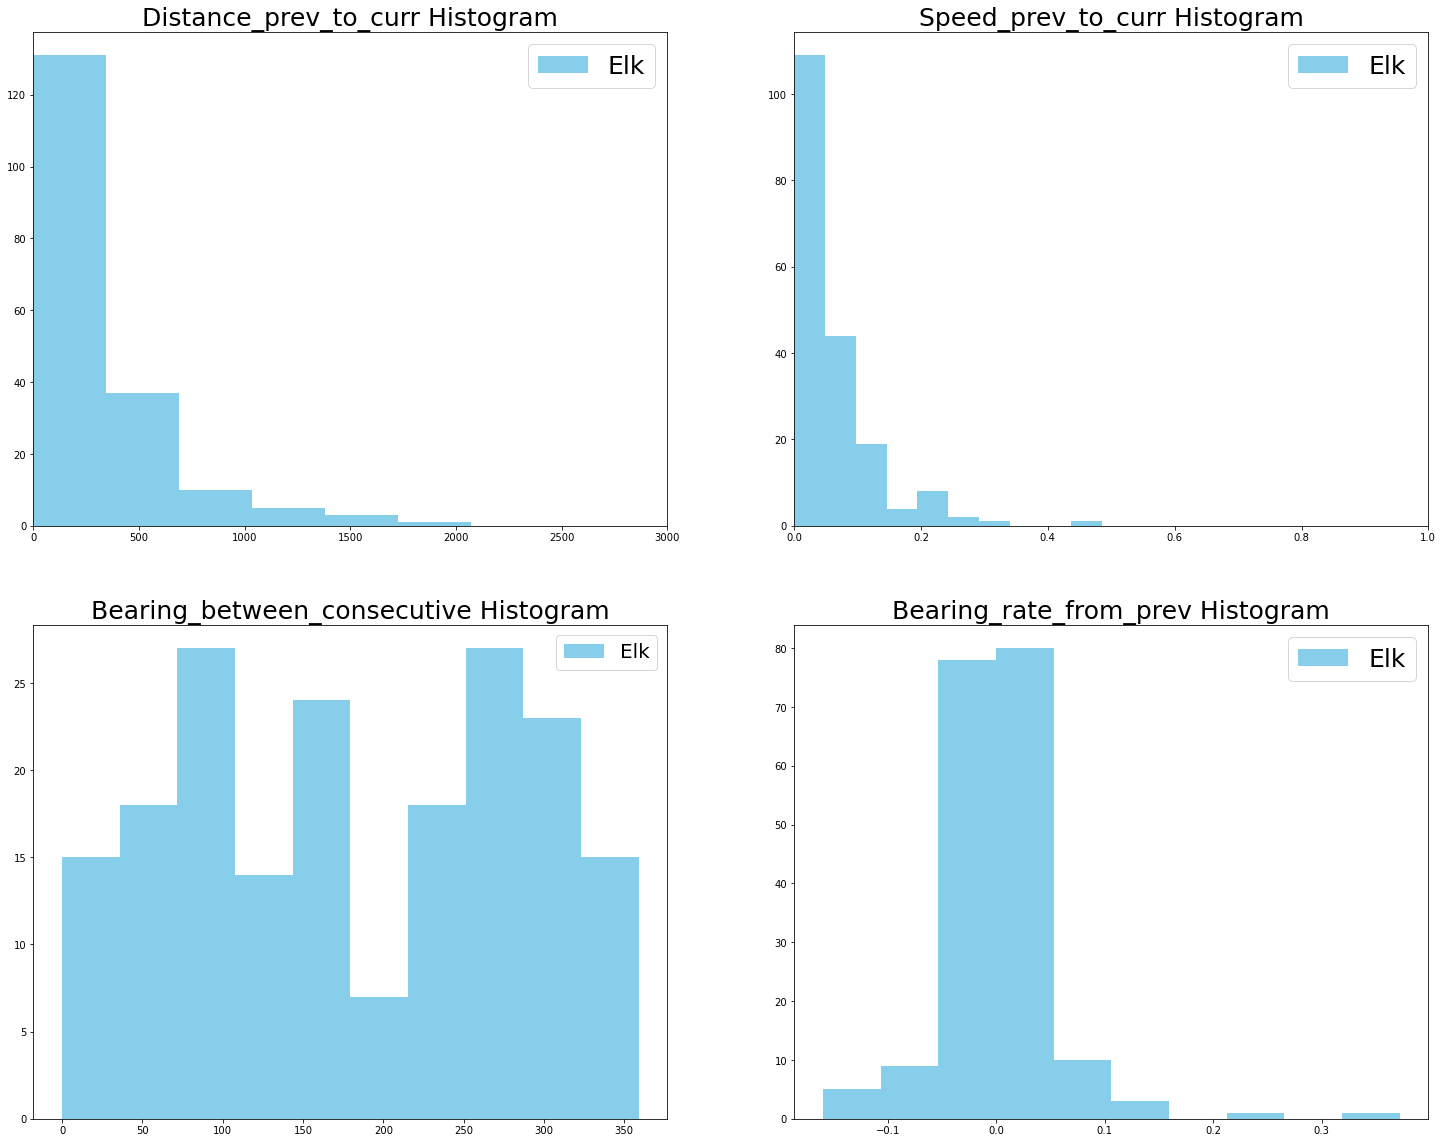

In [15]:

fix, ax = plt.subplots(2, 2, figsize=(25, 20))
ax[0, 0].hist(kinematic_features_k1['Distance_prev_to_curr'], color='skyblue', label='Elk', histtype='stepfilled', linewidth=3),
# ax[0, 0].hist(kinematic_features_k2['Distance_prev_to_curr'], color='grey', label='Deer', histtype='step', linewidth=3),
# ax[0, 0].hist(kinematic_features_k3['Distance_prev_to_curr'], color='green', label='Cattle',  histtype='step', linewidth=2),
ax[0, 0].axis(xmin=0, xmax=3000)
ax[0, 0].set_title('Distance_prev_to_curr Histogram', fontsize=25)
ax[0, 0].legend(loc='upper right', prop={'size': 25})


ax[0, 1].hist(kinematic_features_k1['Speed_prev_to_curr'], color='skyblue', label='Elk', histtype='stepfilled', linewidth=3),
# ax[0, 1].hist(kinematic_features_k2['Speed_prev_to_curr'], color='grey', label='Deer', histtype='step', linewidth=3),
# ax[0, 1].hist(kinematic_features_k3['Speed_prev_to_curr'], color='green', label='Cattle', histtype='step', linewidth=2),
ax[0, 1].axis(xmin=0, xmax=1)
ax[0, 1].set_title('Speed_prev_to_curr Histogram', fontsize=25)
ax[0, 1].legend(loc='upper right', prop={'size': 25})

ax[1, 0].hist(kinematic_features_k1['Bearing_between_consecutive'], color='skyblue', label='Elk', histtype='stepfilled', linewidth=3),
# ax[1, 0].hist(kinematic_features_k2['Bearing_between_consecutive'], color='grey', label='Deer', histtype='step', linewidth=3),
# ax[1, 0].hist(kinematic_features_k3['Bearing_between_consecutive'], color='green', label='Cattle', histtype='step', linewidth=3),
ax[1, 0].set_title('Bearing_between_consecutive Histogram', fontsize=25)
ax[1, 0].legend(loc='upper right', prop={'size': 20})

ax[1, 1].hist(kinematic_features_k1['Bearing_rate_from_prev'], color='skyblue', label='Elk', histtype='stepfilled', linewidth=3),
# ax[1, 1].hist(kinematic_features_k2['Bearing_rate_from_prev'], color='grey', label='Deer', histtype='step', linewidth=3),
# ax[1, 1].hist(kinematic_features_k3['Bearing_rate_from_prev'], color='green', label='Cattle', histtype='step', linewidth=3),
ax[1, 1].set_title('Bearing_rate_from_prev Histogram', fontsize=25)
ax[1, 1].legend(loc='upper right', prop={'size': 25})

In [9]:
f1 = starkey.loc[starkey['Species'] == 'D']
f2 = starkey.loc[starkey['Species'] == 'E']
f3 = starkey.loc[starkey['Species'] == 'C']

In [10]:
f1 = PTRAILDataFrame(data_set=f1.reset_index(), latitude='lat', longitude='lon', traj_id='traj_id', datetime='DateTime')
f2 = PTRAILDataFrame(data_set=f2.reset_index(), latitude='lat', longitude='lon', traj_id='traj_id', datetime='DateTime')
f3 = PTRAILDataFrame(data_set=f3.reset_index(), latitude='lat', longitude='lon', traj_id='traj_id', datetime='DateTime')

In [11]:
f1 = KinematicFeatures.create_speed_from_prev_column(f1)
f2 = KinematicFeatures.create_speed_from_prev_column(f2)
f3 = KinematicFeatures.create_speed_from_prev_column(f3)


In [12]:
print(f"The average speed of deer is: {f1['Speed_prev_to_curr'].mean(skipna=True)} m/s")
print(f"The average speed of elk is: {f2['Speed_prev_to_curr'].mean(skipna=True)} m/s")
print(f"The average speed of cattle is: {f3['Speed_prev_to_curr'].mean(skipna=True)} m/s")

The average speed of deer is: 0.08595855104608327 m/s
The average speed of elk is: 0.14014369076099686 m/s
The average speed of cattle is: 0.07465261520270267 m/s


(array([15., 18., 27., 14., 24.,  7., 18., 27., 23., 15.]),
 array([  0.        ,  35.88886208,  71.77772417, 107.66658625,
        143.55544834, 179.44431042, 215.33317251, 251.22203459,
        287.11089668, 322.99975876, 358.88862084]),
 [<matplotlib.patches.Polygon at 0x7fb430849370>])

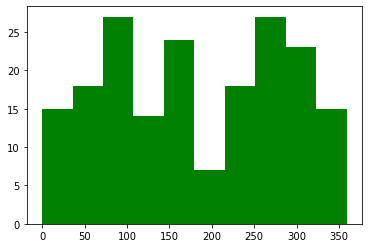

In [20]:
plt.hist(kinematic_features_k1['Bearing_between_consecutive'], color='green', label='Elk', histtype='stepfilled', linewidth=3)